#Impoting Liberaries for operations.


In [2]:
import pandas as pd               #to read and perform different operation on data.
import numpy as np
import matplotlib.pyplot as plt   #For visiualisation.
import seaborn as sns             #For data Visiualisation.
import sklearn
from sklearn.preprocessing import LabelEncoder #Encoding the categorial data.
from sklearn.model_selection import train_test_split #To split the data for training and testing.
from sklearn.naive_bayes import GaussianNB          #To train model with GaussianNB algorithm
from sklearn.naive_bayes import BernoulliNB         #To train model with BernoulliNB aldorithm.
from sklearn.tree import DecisionTreeClassifier     # #To train model with DecisionTreeClassifier aldorithm.
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)  #To find the accuracy and confusion matrix.
from sklearn import tree                               #To train model with DecisionTree aldorithm.
from sklearn.metrics import (precision_score, recall_score, f1_score)  #to find the precision Score,recall score and f1 score
from sklearn.model_selection import cross_validate     #To cross validate the model
from sklearn.model_selection import GridSearchCV #To tune model by analysing hyperparameter
from sklearn.model_selection import RandomizedSearchCV
import pickle #For saving the model in file.

In [3]:
df=pd.read_csv('indian_liver_patient.csv')  #Read data File.
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1


In [4]:
df.shape     #To know shape of dataframe

(583, 11)

In [5]:
df.duplicated().sum()      #To find duplicate values

12

In [6]:
df.info() #Looking information of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      580 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        581 non-null    float64
 5   Alamine_Aminotransferase    581 non-null    float64
 6   Aspartate_Aminotransferase  580 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 50.2+ KB


In [7]:
def fill_null(df,Gender,indices,fill_values):
  '''Function to fill the null values in Gender Column according to indices'''
  df.loc[indices,Gender]=df.loc[indices,Gender].fillna(fill_values)
  return df


In [8]:
indices_to_fill=[9,29,57]             #Filling null values in Gender column with random values.
fill_values={9:'A',29:'B',57:'C'}

df=fill_null(df,'Gender',indices_to_fill,fill_values)


In [9]:
df.isnull().sum() #Looking for null values in data.

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              1
Alkaline_Phosphotase          2
Alamine_Aminotransferase      2
Aspartate_Aminotransferase    3
Total_Protiens                0
Albumin                       1
Albumin_and_Globulin_Ratio    5
Dataset                       0
dtype: int64

#Data Visualization

<Axes: xlabel='Gender', ylabel='Albumin_and_Globulin_Ratio'>

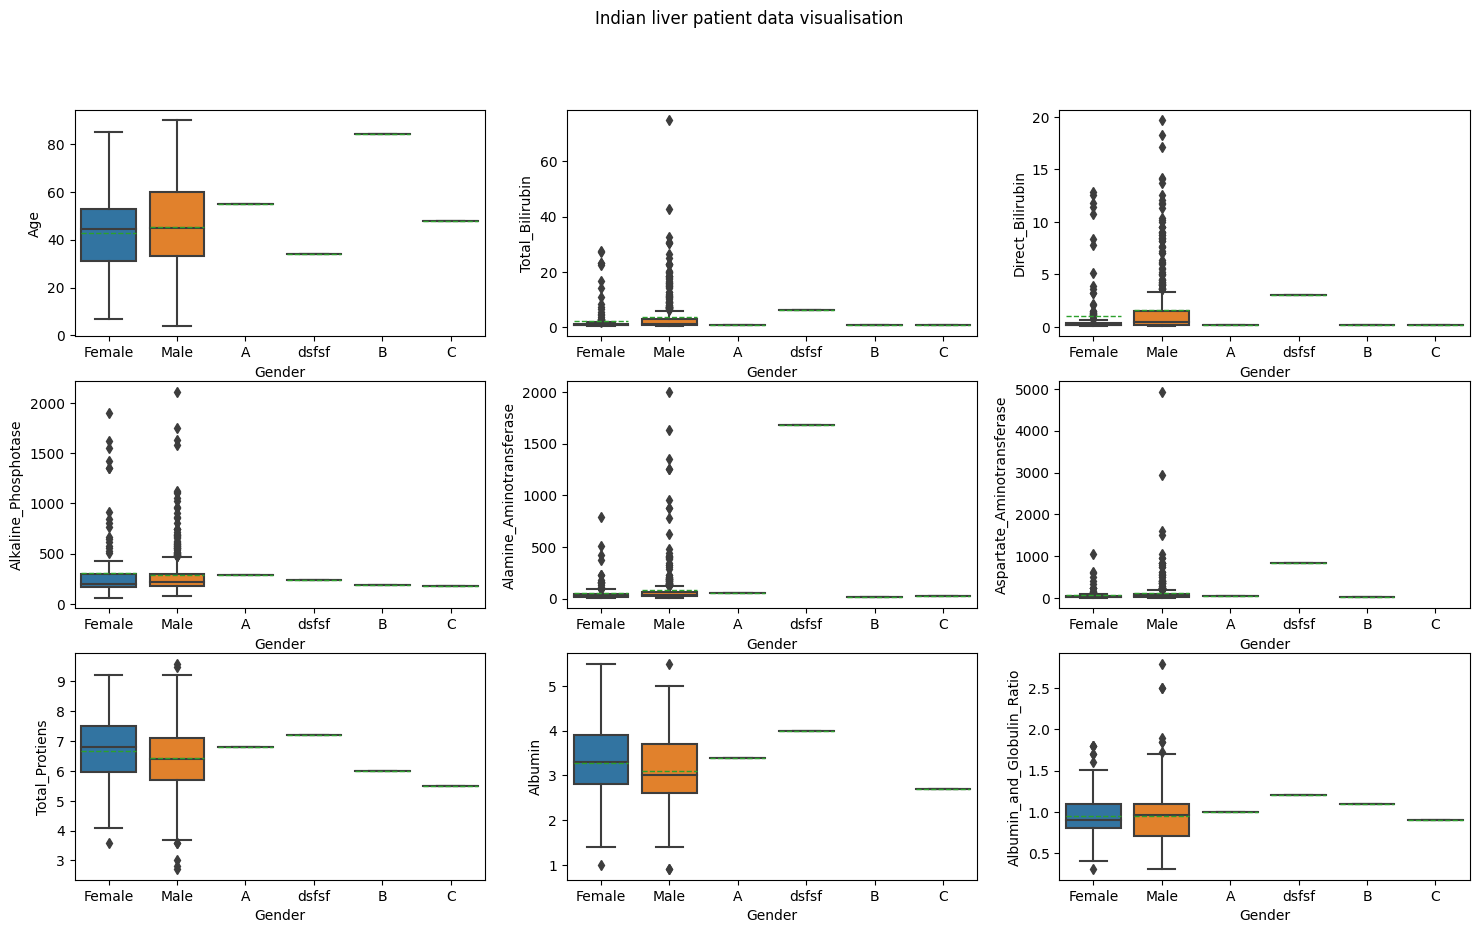

In [10]:
fig, axes = plt.subplots(3,3, figsize=(18, 10))              #Plotting box plot to look the distribution of data reference to Gender column.
fig.suptitle('Indian liver patient data visualisation')

sns.boxplot(ax=axes[0, 0], data=df, y='Age',x='Gender',showmeans=True,meanline=True)
sns.boxplot(ax=axes[0, 1], data=df, y='Total_Bilirubin',x='Gender',showmeans=True,meanline=True)
sns.boxplot(ax=axes[0, 2], data=df, y='Direct_Bilirubin',x='Gender',showmeans=True,meanline=True)
sns.boxplot(ax=axes[1, 0], data=df, y='Alkaline_Phosphotase',x='Gender',showmeans=True,meanline=True)
sns.boxplot(ax=axes[1, 1], data=df, y='Alamine_Aminotransferase',x='Gender',showmeans=True,meanline=True)
sns.boxplot(ax=axes[1, 2], data=df, y='Aspartate_Aminotransferase',x='Gender',showmeans=True,meanline=True)
sns.boxplot(ax=axes[2, 0], data=df, y='Total_Protiens',x='Gender',showmeans=True,meanline=True)
sns.boxplot(ax=axes[2, 1], data=df, y='Albumin',x='Gender',showmeans=True,meanline=True)
sns.boxplot(ax=axes[2, 2], data=df, y='Albumin_and_Globulin_Ratio',x='Gender',showmeans=True,meanline=True)



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) th

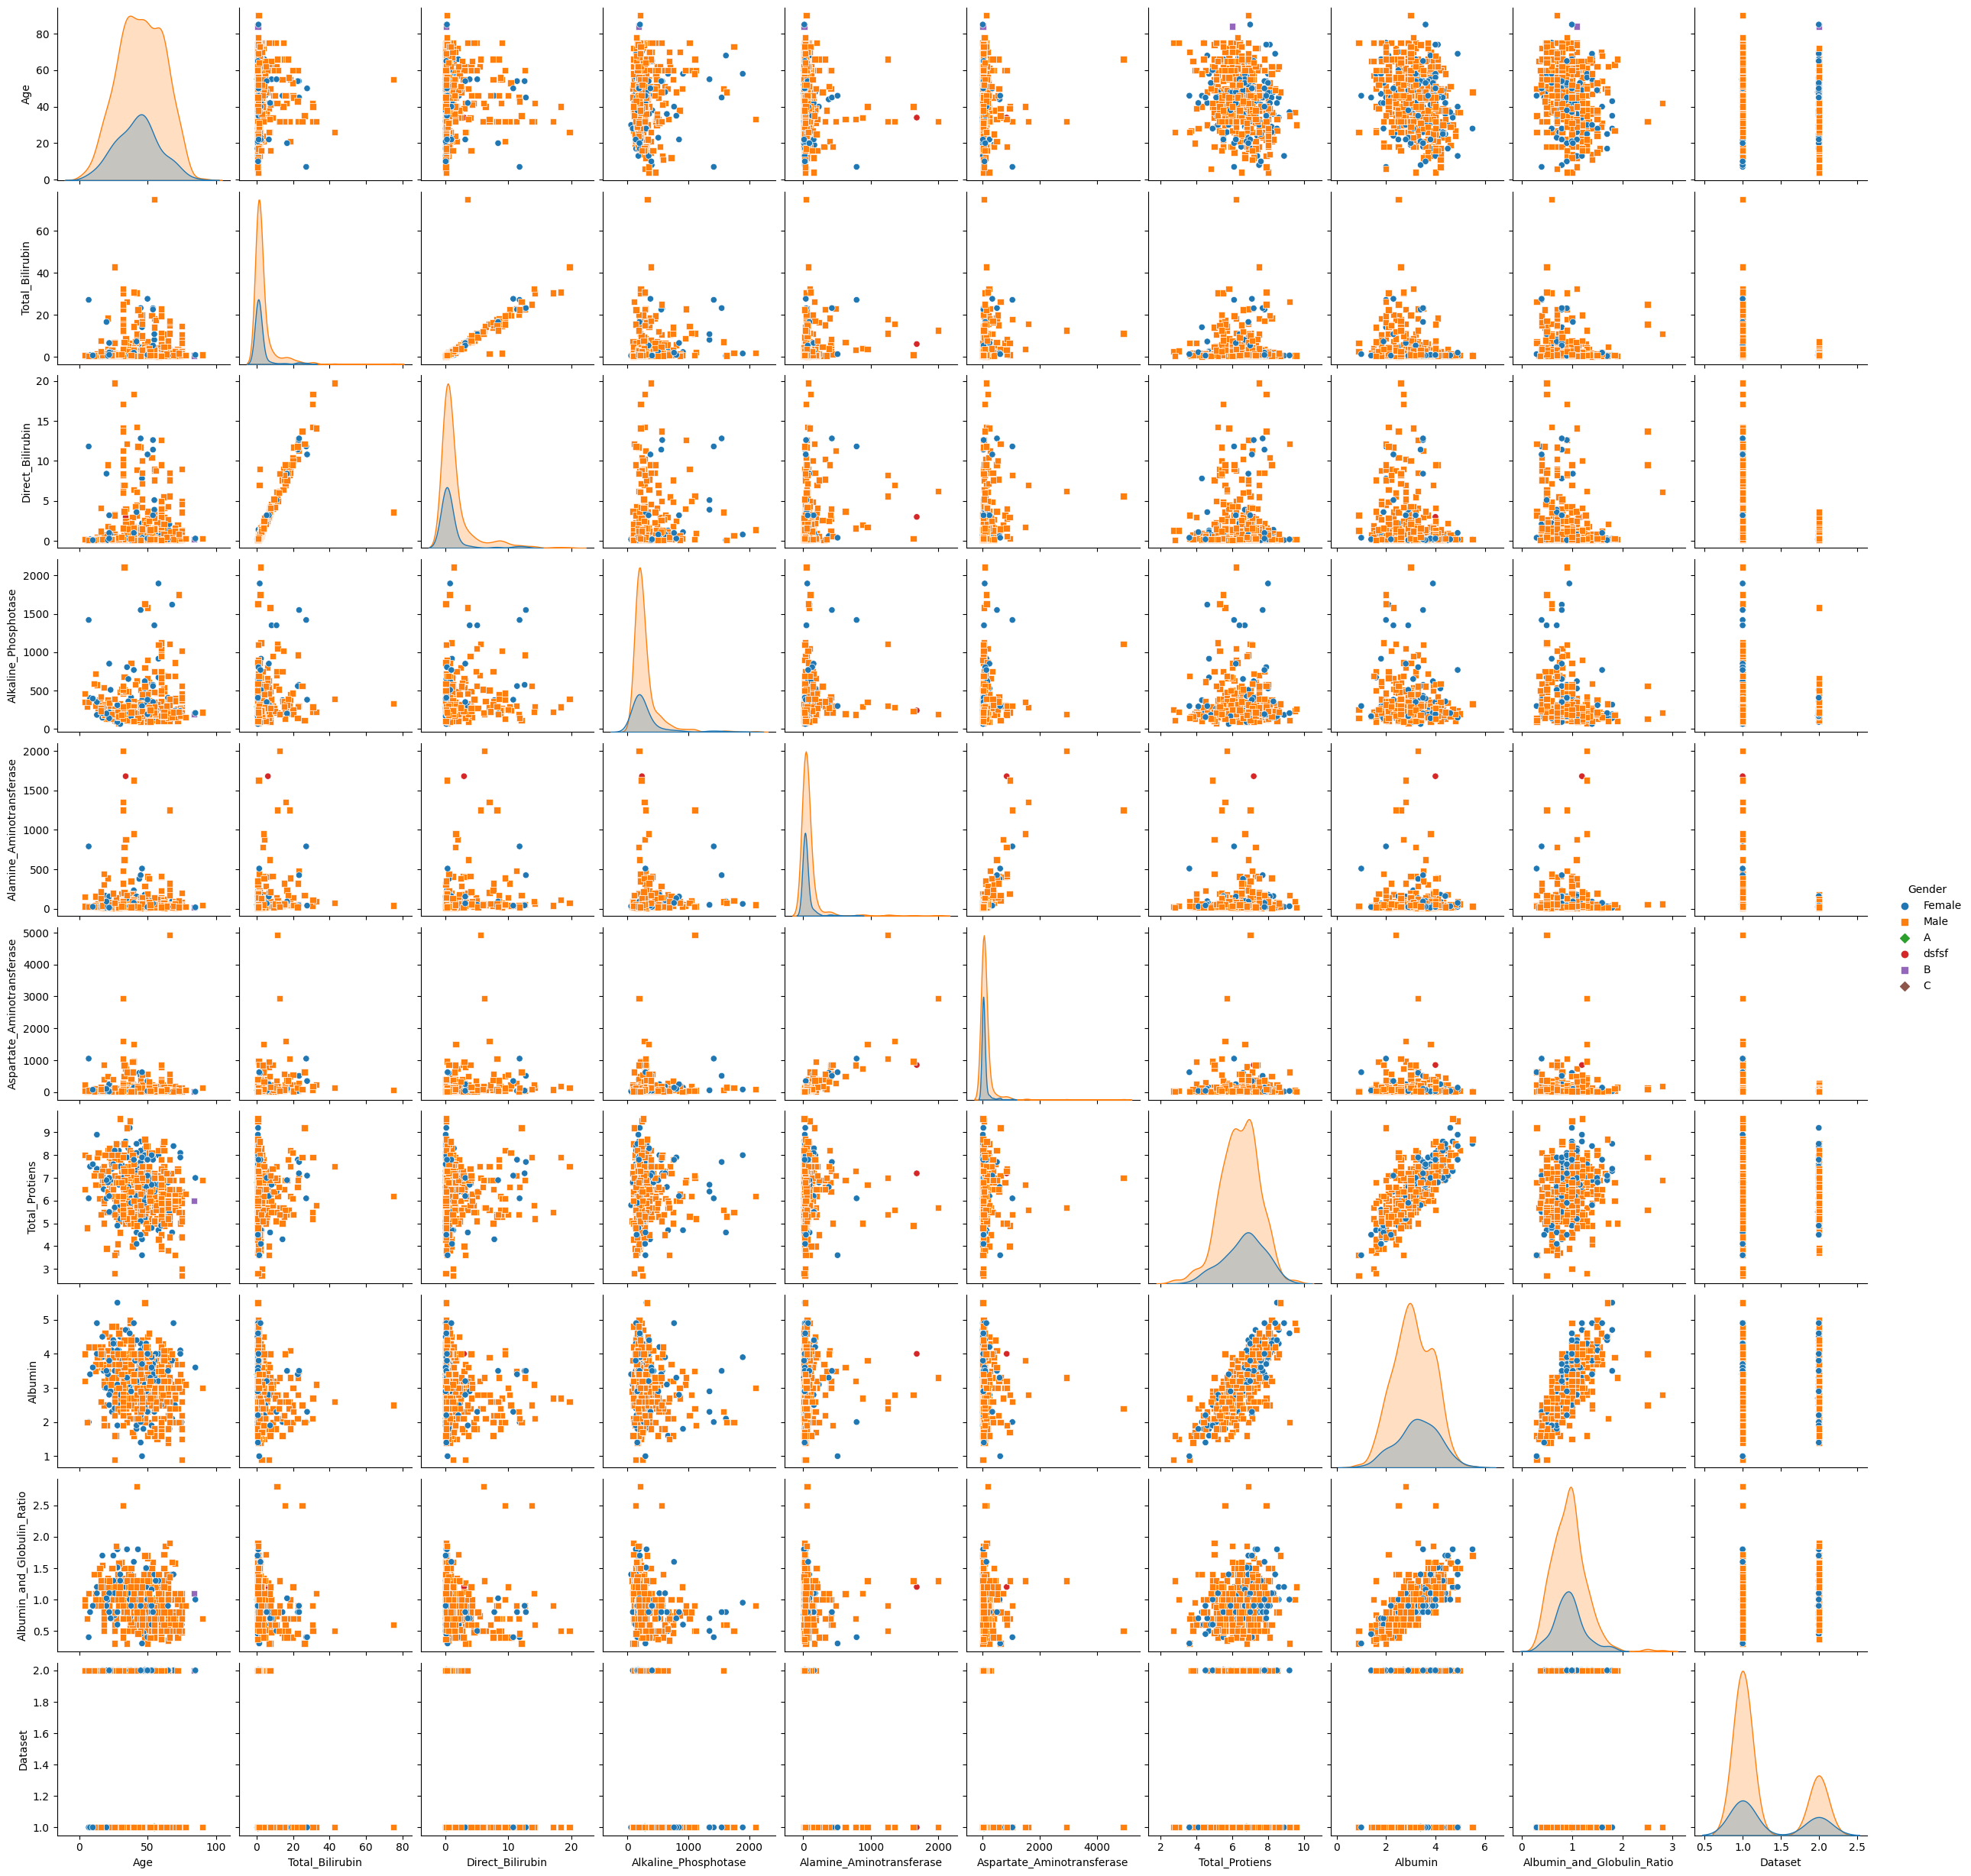

In [11]:
sns.pairplot(df, hue="Gender",markers=["o", "s", "D",]) #Pair plot to look at the relational distribution.

#Feature Engineering

#Filling the missing values-
##Looking at the box plots and the pairplot above we can assume that for attributes having numerical missing values.We can fill them looking at distribution of each feature.
##So where the distribution is normal fillna with mean of the attribute and where distribution is slightly deviated use median to bring it to normal.


In [12]:
df['Direct_Bilirubin']=df['Direct_Bilirubin'].fillna(df['Direct_Bilirubin'].median())
df['Alkaline_Phosphotase']=df['Alkaline_Phosphotase'].fillna(df['Alkaline_Phosphotase'].median())
df['Alamine_Aminotransferase']=df['Alamine_Aminotransferase'].fillna(df['Alamine_Aminotransferase'].median())
df['Aspartate_Aminotransferase']=df['Aspartate_Aminotransferase'].fillna(df['Aspartate_Aminotransferase'].median())
df['Albumin']=df['Albumin'].fillna(df['Albumin'].mean())
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())

##When we look at the red and purpule dot in pair plot and find their relatiion with male and female values we can assume missing value dsfsf is near to male and value B is near to female.Similarly looking at box plot we can assume value A is near to male value and C near female value.  

In [13]:
df = df.replace(['dsfsf'], 'Male') #Replace null values with male and female.
df = df.replace(['B'], 'Female')
df = df.replace(['A'], 'Male')
df = df.replace(['C'], 'Female')

In [14]:
df['Gender'].value_counts() #To check the count of male and female in table.

Male      441
Female    142
Name: Gender, dtype: int64

In [15]:
df.isnull().sum() #Confirm if there is any null value.

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

#Finding Correlation in Attributes.

<ipython-input-16-3e100283a279>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2=df.corr(method='pearson')


<Axes: >

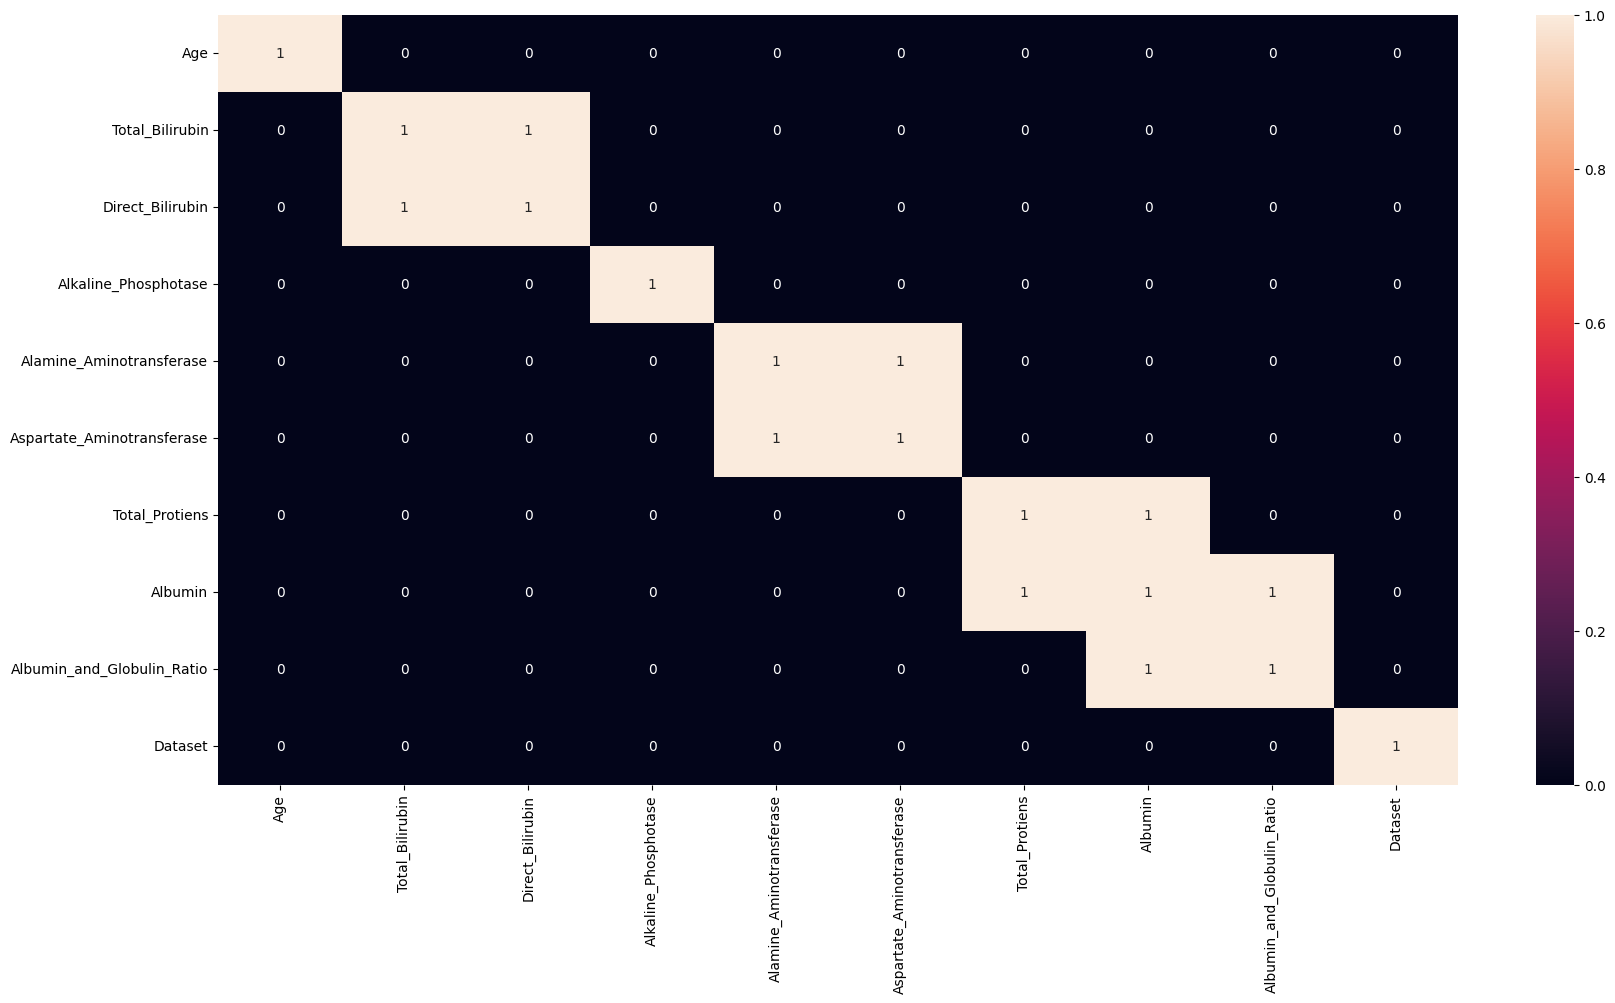

In [16]:
df2=df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(df2>.5,annot=True)

##Looking a above heatmap we can analyze that there are pairs of correleted attributes.
##Total_Bilirubin - Direct_Bilirubin
##Alamine_Aminotransferase - Aspartate_Aminotransferase
##Total_Protiens - Albumin - Albumin_and_Globulin_Ratio 

#Encoding categorical attributes

In [17]:
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

#Training Model and Evaluating Model

In [20]:
from sklearn.preprocessing import RobustScaler   #Training data Scaling.
rs= RobustScaler()
normal_df=df.drop('Dataset', axis=1)
X=rs.fit_transform(normal_df)
Y =df['Dataset']
filename='Normalize_data_model.py'
pickle.dump(X,open(filename,'wb'))
scaled_data_model=pickle.load(open('Normalize_data_model.py','rb'))

'We can see most of the features get normalized'

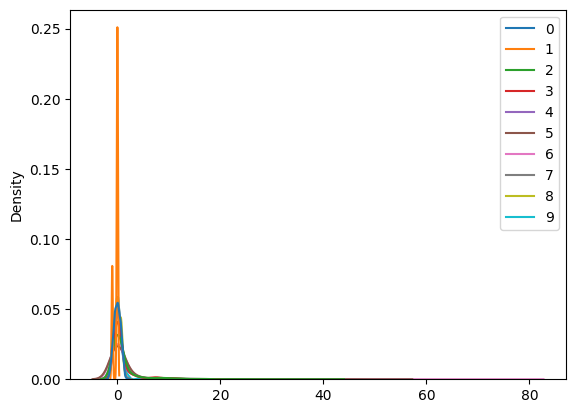

In [25]:
sns.kdeplot(X)  #Impact on data after robust scaling.
'''We can see most of the features get normalized'''

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(                        #Split Data for Training and Testing 80-20.
                                                X,Y,test_size=0.2,     
                                                random_state=14)

#Model-Algorithm
##1.GaussianNB
##2.BernoulliNB
##3.DecisionTreeClassifire

In [27]:
def algorithm(classifier, X_train, Y_train, X_test, Y_test):
    '''Function to evaluate different algorithm by passing split data'''
    classifier.fit(X_train, Y_train)
    predictions = classifier.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    confusion = confusion_matrix(Y_test, predictions)
    
    print('Accuracy Score:', accuracy)
    print('Precision Score:', precision)
    print('Recall Score:', recall)
    print('F1 Score:', f1)
    print('Confusion Matrix:')
    print(confusion)

In [28]:
print('Model1 GaussianNB Evaluation:')            #Prediction scores of all algorithm.
gb = GaussianNB(var_smoothing=1.5)
algorithm(gb, X_train, Y_train, X_test, Y_test)

print('Model2 BernoulliNB Evalution:')
bNB = BernoulliNB(alpha=0.001)
algorithm(bNB, X_train, Y_train, X_test, Y_test)

print('Model3 DecisionTreeClassifire Evalution:')
clf=DecisionTreeClassifier(max_depth=1,criterion='gini')
algorithm(clf, X_train, Y_train, X_test, Y_test)

Model1 GaussianNB Evaluation:
Accuracy Score: 0.7606837606837606
Precision Score: 0.8023255813953488
Recall Score: 0.8625
F1 Score: 0.8313253012048193
Confusion Matrix:
[[69 11]
 [17 20]]
Model2 BernoulliNB Evalution:
Accuracy Score: 0.7350427350427351
Precision Score: 0.8024691358024691
Recall Score: 0.8125
F1 Score: 0.8074534161490683
Confusion Matrix:
[[65 15]
 [16 21]]
Model3 DecisionTreeClassifire Evalution:
Accuracy Score: 0.6837606837606838
Precision Score: 0.6837606837606838
Recall Score: 1.0
F1 Score: 0.8121827411167513
Confusion Matrix:
[[80  0]
 [37  0]]


#Cross Validating Model

In [29]:
#Model1 GaussianNB
cv_results=cross_validate(gb, X_train, Y_train, cv=5)
cv_results

{'fit_time': array([0.00255108, 0.00176024, 0.00153613, 0.00167704, 0.00116801]),
 'score_time': array([0.00177932, 0.00128865, 0.00124383, 0.0009973 , 0.00090146]),
 'test_score': array([0.72340426, 0.64516129, 0.6344086 , 0.70967742, 0.58064516])}

In [30]:
#Model2 BernaoulliesNB
cv_results=cross_validate(bNB, X_train, Y_train, cv=5)
cv_results

{'fit_time': array([0.00598001, 0.00332761, 0.00201273, 0.00184011, 0.00175285]),
 'score_time': array([0.00216365, 0.00113726, 0.0010047 , 0.00095916, 0.00139523]),
 'test_score': array([0.65957447, 0.66666667, 0.6344086 , 0.68817204, 0.67741935])}

In [31]:
#Model4 Dicision Tree
cv_results=cross_validate(clf, X_train, Y_train, cv=5)
cv_results

{'fit_time': array([0.00212049, 0.00232816, 0.00207186, 0.00168991, 0.00187445]),
 'score_time': array([0.00119352, 0.00191236, 0.00117397, 0.00472808, 0.00113535]),
 'test_score': array([0.72340426, 0.72043011, 0.72043011, 0.72043011, 0.72043011])}

#Model Tuning

##1.Gridsearch for Decisiontree


In [32]:
paramsdt={'min_samples_leaf': [1,2,3,4,5],   #Provide parameter in Decisiontree
        'max_depth': [1,2,3],
        'criterion':['gini','entropy','log_loss']}
grid=GridSearchCV(estimator=clf,
                  param_grid=paramsdt,
                  cv=5,n_jobs=4,verbose=2)
grid.fit(X_train, Y_train)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=1), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             verbose=2)

In [33]:
print('Decisiontree best Score:', grid.best_score_)
print('Decisiontree best Parameter:', grid.best_params_)
print('Decisiontree best Index:', grid.best_index_)
print('Decisiontree best Estimetor:', grid.best_estimator_)
print('Decisiontree Fit time:',grid.refit_time_)

Decisiontree best Score: 0.7210249370853352
Decisiontree best Parameter: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
Decisiontree best Index: 0
Decisiontree best Estimetor: DecisionTreeClassifier(max_depth=1)
Decisiontree Fit time: 0.001836538314819336


##2.Gridsearch for GaussionNB

In [34]:
paramsgb={'var_smoothing':[0.001,0.01,0.09,1,1.1,1.2,1.3,1.5,2,2.5]}
gridgb=GridSearchCV(estimator=gb,
                  param_grid=paramsgb,
                  cv=5,n_jobs=4,verbose=2)
gridgb.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=GaussianNB(var_smoothing=1.5), n_jobs=4,
             param_grid={'var_smoothing': [0.001, 0.01, 0.09, 1, 1.1, 1.2, 1.3,
                                           1.5, 2, 2.5]},
             verbose=2)

In [35]:
print('GaussianNB best Score:', gridgb.best_score_)
print('GaussianNB best Parameter:', gridgb.best_params_)
print('GaussianNB best Index:', gridgb.best_index_)
print('GaussianNB Fit time:',gridgb.refit_time_)

GaussianNB best Score: 0.7210249370853352
GaussianNB best Parameter: {'var_smoothing': 2}
GaussianNB best Index: 8
GaussianNB Fit time: 0.0017693042755126953


##3.Gridsearch for BernoulliesNB

In [36]:
paramsnb={'alpha':[0.001,0.01,0.1,1,1.1]}
gridbnb=GridSearchCV(estimator=bNB,
                  param_grid=paramsnb,
                  cv=5,n_jobs=4,verbose=2)
gridbnb.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=BernoulliNB(alpha=0.001), n_jobs=4,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 1.1]}, verbose=2)

In [37]:
print('BernoulliNB best Score:', gridbnb.best_score_)
print('BernoulliNB best Parameter:', gridbnb.best_params_)
print('BernoulliNB best Index:', gridbnb.best_index_)
print('BernoulliNB Fit time:',gridbnb.refit_time_)

BernoulliNB best Score: 0.6652482269503545
BernoulliNB best Parameter: {'alpha': 0.001}
BernoulliNB best Index: 0
BernoulliNB Fit time: 0.002091646194458008


##RandomizedSearchCV for GaussianNB

In [38]:
distributionsgb = dict(var_smoothing=range(1,5))
randgb=RandomizedSearchCV(gb,
                          distributionsgb,
                          random_state=14)
randgb.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=GaussianNB(var_smoothing=1.5),
                   param_distributions={'var_smoothing': range(1, 5)},
                   random_state=14)

In [39]:
print('GaussianNB best Score:', randgb.best_score_)
print('GaussianNB best Parameter:',randgb.best_params_)
print('GaussianNB best Index:', randgb.best_index_)
print('GaussianNB fit time:',randgb.refit_time_)

GaussianNB best Score: 0.7210249370853352
GaussianNB best Parameter: {'var_smoothing': 2}
GaussianNB best Index: 1
GaussianNB fit time: 0.0009279251098632812


##RandomizedSearchCV for Decisiontree

In [40]:
distributionsdt = dict(max_depth=range(1,5),criterion=['gini','entropy','log_loss'])
randdt=RandomizedSearchCV(clf,
                          distributionsdt,
                          random_state=14)
randdt.fit(X_train,Y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_depth=1),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 5)},
                   random_state=14)

In [41]:
print('Decisiontree best Score:', randdt.best_score_)
print('Decisiontree best Parameter:',randdt.best_params_)
print('Decisiontree best Index:', randdt.best_index_)
print('Decisiontree fit time:',randdt.refit_time_)

Decisiontree best Score: 0.7210249370853352
Decisiontree best Parameter: {'max_depth': 1, 'criterion': 'gini'}
Decisiontree best Index: 2
Decisiontree fit time: 0.0008783340454101562


##RandomizedSearchCV for BernoulliNB

In [42]:
distributions = dict(alpha=range(1,5))
randbnb=RandomizedSearchCV(bNB,
                           distributions,
                           random_state=14)
randbnb.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=BernoulliNB(alpha=0.001),
                   param_distributions={'alpha': range(1, 5)}, random_state=14)

In [43]:
print('BernoulliNB best Score:', randbnb.best_score_)
print('BernoulliNB  best Parameter:',randbnb.best_params_)
print('BernoulliNB fit time:',randbnb.refit_time_)

BernoulliNB best Score: 0.6673987645847631
BernoulliNB  best Parameter: {'alpha': 3}
BernoulliNB fit time: 0.0021605491638183594


#Result Dataframe

In [44]:
result_df = pd.DataFrame({'Algorithm': ['GaussianNB','BernoulliNB','DecisionTreeClassifier'],
                               'Accuracy': [0.7606837606837606,0.7350427350427351,0.6837606837606838],
                               'Precision': [0.8023255813953488,0.8024691358024691,0.6837606837606838],
                               'Recall': [0.8625,0.8125,1.0],
                               'F1 Score': [0.8313253012048193,0.8074534161490683,0.8121827411167513],
                               })
#Print DtatFrame    
result_df





,Algorithm,Accuracy,Precision,Recall,F1 Score
0,GaussianNB,0.760684,0.802326,0.8625,0.831325
1,BernoulliNB,0.735043,0.802469,0.8125,0.807453
2,DecisionTreeClassifier,0.683761,0.683761,1.0000,0.812183


In [45]:
result_df.to_csv("Final_result1_df.csv", index=False)

##Comparision of models NB and DT

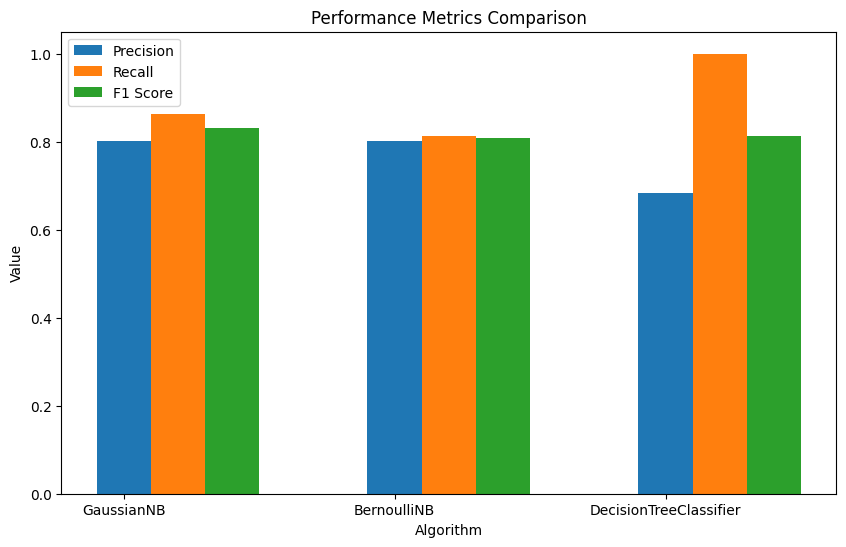

In [46]:
algorithms = result_df['Algorithm']
metrics = result_df.columns[2:]
x = np.arange(len(algorithms))
width = 0.2

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + (i * width), result_df[metric], width, label=metric)

# Add labels, title, and legend
plt.xlabel('Algorithm')
plt.ylabel('Value')
plt.title('Performance Metrics Comparison')
plt.xticks(x, algorithms)
plt.legend()
plt.show()

#Exaplaination:-
##1.Looking at above table we can say that the model GaussianNB has maximum accuracy.
##2.Precision of BernoulliNB is maximum in all model.
##3.Decisiontree has maximum recall value.
##4.F1 score of GaussianNB model is maximum.
##So from above data we can say that in most of the scenarios model GaussianNB is predicting better with respect to other models but which also not the best and have some flaws and still it has some scope of improvement.

In [47]:
GridsearchCV_result_df = pd.DataFrame({'Algorithm': ['GaussianNB','BernoulliNB','DecisionTreeClassifier'],
                                   'Best_Score': [0.7210249370853352,0.6652482269503545,0.7210249370853352],
                                   'Best_parameter': [('var_smoothing: 2'),('alpha :0.001'),('criterion:gini', 'max_depth:1', 'min_samples_leaf:1')],
                                  'Fit_time': [ 0.001397848129272461,0.0024242401123046875,0.0014793872833251953]})
#Print DtatFrame    
GridsearchCV_result_df





,Algorithm,Best_Score,Best_parameter,Fit_time
0,GaussianNB,0.721025,var_smoothing: 2,0.001398
1,BernoulliNB,0.665248,alpha :0.001,0.002424
2,DecisionTreeClassifier,0.721025,"(criterion:gini, max_depth:1, min_samples_leaf:1)",0.001479


In [48]:
RandomizedSearchCV_result_df = pd.DataFrame({ 'Best_Score':[0.7210249370853352,0.6673987645847631, 0.7210249370853352],
                                   'Best_parameter': [('var_smoothing: 2'),('alpha:3'),('criterion:gini', 'max_depth: 1', 'min_samples_leaf: 1')],
                                  'Fit_time': [0.0008556842803955078,0.0013806819915771484,0.0009303092956542969]})
#Print DtatFrame    
RandomizedSearchCV_result_df


,Best_Score,Best_parameter,Fit_time
0,0.721025,var_smoothing: 2,0.000856
1,0.667399,alpha:3,0.001381
2,0.721025,"(criterion:gini, max_depth: 1, min_samples_lea...",0.000930


#Explaination:-
##1.By looking at above two table we can say that there is no much difference with respect to the scores and parameter choosing for all the model by two methods.
##2.The only parameter on which we can say the RandomizedSearchCV method work best is time required to fit model.
##3.So on the basis of model fit time measure we can say RandomizedSearchCV method work better than GridsearchCV.

In [49]:
filename='GaussianNB_prediction_model1.py'
pickle.dump(gb,open(filename,'wb'))

In [52]:
load_model=pickle.load(open('GaussianNB_prediction_model1.py','rb'))

In [53]:
load_model.predict(X_test)

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1])